In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [2]:
df = pd.read_csv(r"C:\Users\Ameer\OneDrive\שולחן העבודה\AI digital\Projects\Supervised learning project\customer_churn_dataset (1).csv")

In [3]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [4]:
##data preperation
##Checking for duplicates based on CustomerID
df_copy = df.copy()
df_copy[df_copy.duplicated(subset="CustomerID")]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [5]:
##No duplicates in the data.
##Checking for None values
df_copy.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [6]:
##no None values in the data
##well set CustomerID as out index
df_copy = df_copy.set_index("CustomerID")

In [7]:
df_copy = pd.get_dummies(df_copy)

In [8]:
df_copy

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
CustomerID,,,,,,,,,,,,,,,,
1,22,25,14,4,27,598,9,1,True,False,True,False,False,False,True,False
2,41,28,28,7,13,584,20,0,True,False,False,False,True,False,True,False
3,47,27,10,2,29,757,21,0,False,True,False,True,False,True,False,False
4,35,9,12,5,17,232,18,0,False,True,False,True,False,False,False,True
5,53,58,24,9,2,533,18,0,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64370,45,33,12,6,21,947,14,1,True,False,True,False,False,False,False,True
64371,37,6,1,5,22,923,9,1,False,True,False,False,True,True,False,False
64372,25,39,14,8,30,327,20,1,False,True,False,True,False,False,True,False


In [9]:
##We are finished with the data preperation
##checking correlation between the features and the label
df_copy.corr()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
Age,1.000000,-0.007763,-0.038331,0.005014,-0.016132,0.006490,-0.000148,0.063457,-0.001800,0.001800,-0.001585,-0.004582,0.006161,-0.000740,0.001311,-0.000585
Tenure,-0.007763,1.000000,0.023485,0.060065,0.055963,0.009474,0.005770,0.195327,-0.029418,0.029418,-0.002201,-0.002881,0.005078,0.001039,-0.003306,0.002310
Usage Frequency,-0.038331,0.023485,1.000000,-0.014072,0.031132,0.001527,-0.009192,-0.115098,0.006907,-0.006907,0.000381,0.000364,-0.000744,-0.013769,0.008066,0.005677
Support Calls,0.005014,0.060065,-0.014072,1.000000,0.064298,0.021750,0.001666,0.304631,-0.035418,0.035418,0.005258,-0.005009,-0.000250,0.010961,-0.016492,0.005705
Payment Delay,-0.016132,0.055963,0.031132,0.064298,1.000000,-0.031119,-0.008076,0.557386,0.058578,-0.058578,0.003297,-0.003979,0.000680,-0.016042,0.028522,-0.012800
Total Spend,0.006490,0.009474,0.001527,0.021750,-0.031119,1.000000,-0.007692,-0.078867,-0.029337,0.029337,-0.000311,0.006925,-0.006608,-0.018179,0.024744,-0.006814
Last Interaction,-0.000148,0.005770,-0.009192,0.001666,-0.008076,-0.007692,1.000000,-0.002818,0.000472,-0.000472,0.004521,-0.005186,0.000662,-0.003731,0.000819,0.002925
Churn,0.063457,0.195327,-0.115098,0.304631,0.557386,-0.078867,-0.002818,1.000000,0.164549,-0.164549,0.012869,-0.012334,-0.000539,-0.016284,0.061464,-0.046000
Gender_Female,-0.001800,-0.029418,0.006907,-0.035418,0.058578,-0.029337,0.000472,0.164549,1.000000,-1.000000,0.005664,-0.000281,-0.005380,-0.022167,0.028741,-0.006856
Gender_Male,0.001800,0.029418,-0.006907,0.035418,-0.058578,0.029337,-0.000472,-0.164549,-1.000000,1.000000,-0.005664,0.000281,0.005380,0.022167,-0.028741,0.006856


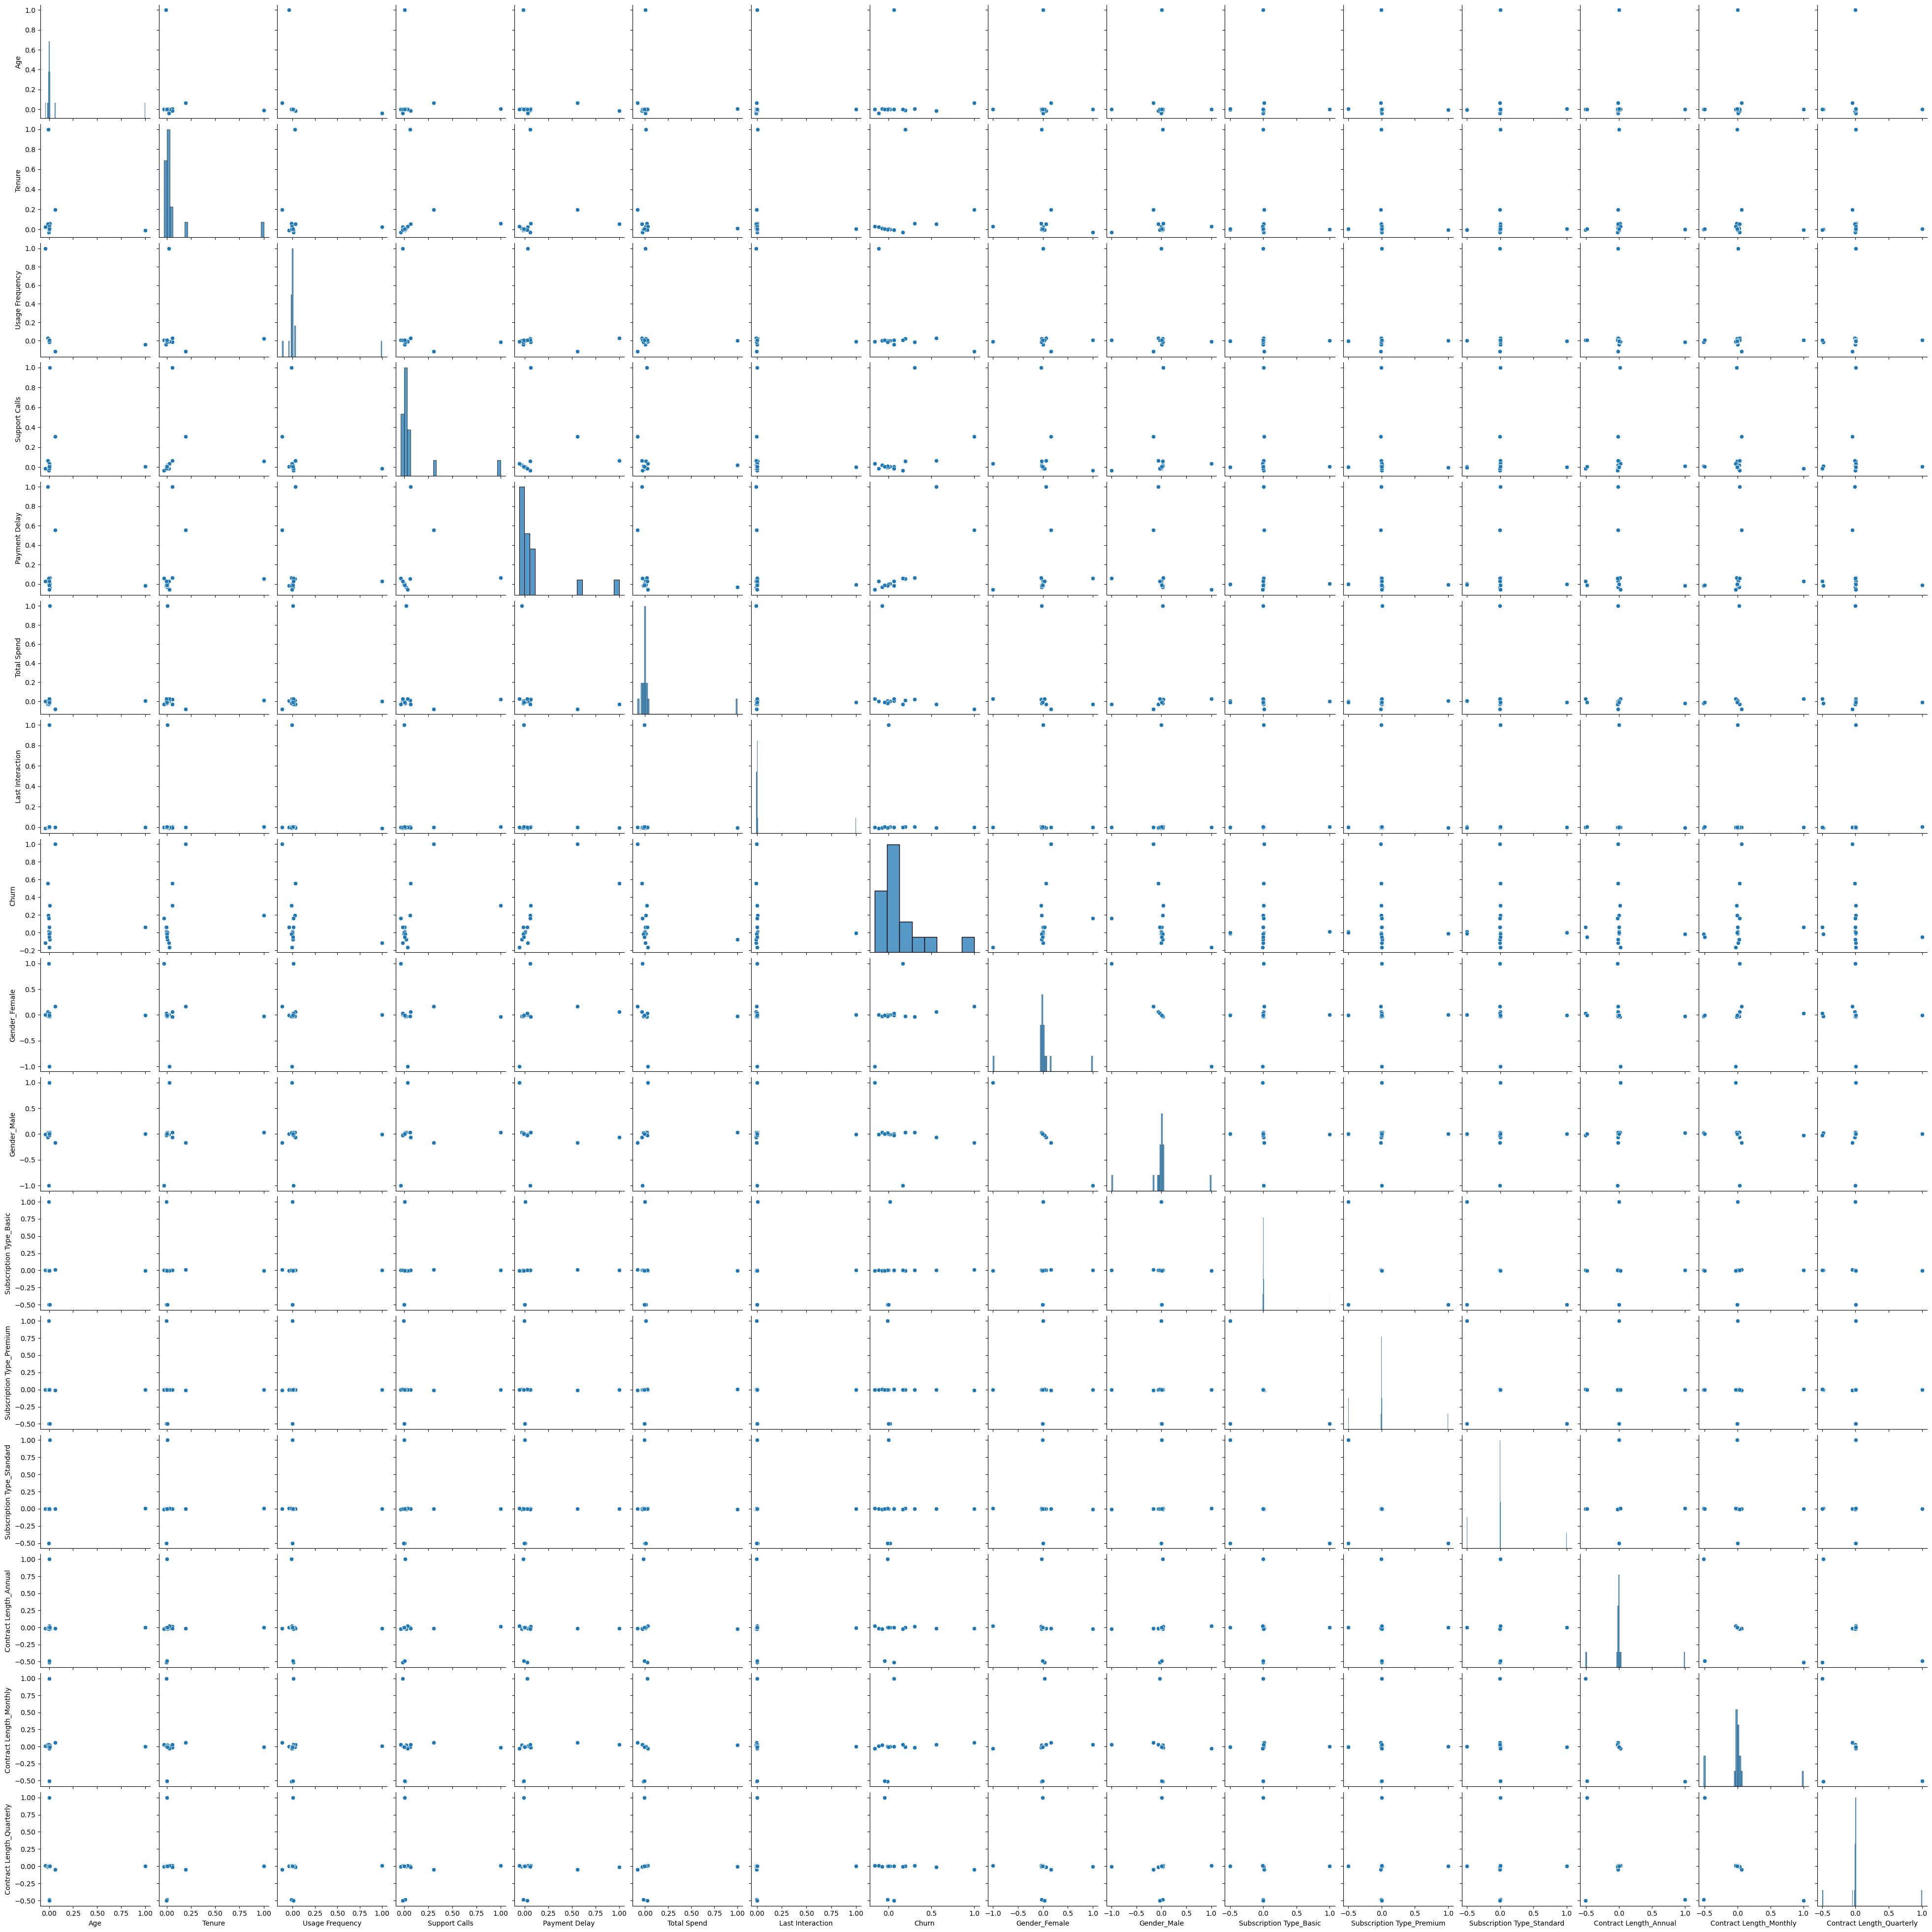

In [10]:
sns.pairplot(df_copy.corr())
plt.show()


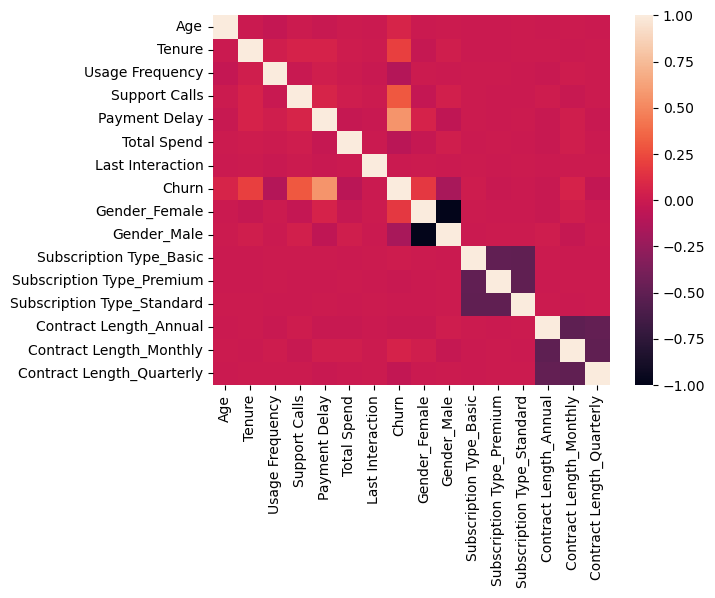

In [11]:
##its very difficuly to see the correlations in this pairplot, well generate a heatmap instead
sns.heatmap(df_copy.corr())
plt.show()

In [12]:
##from what we see we can understand that there are a few features that affect churn the most,
##them being: "Tenure", "Support Calls" and "Payment delay", from this we can infer a few things
##1. the longer a customer has been with the company the higher the chance of them leaving.
## I think that could be because newer customer have yet to feel the "flaws" in the company that would cause them to leave.
##2. the longer the their payment has been delayed the higher the chances of them leaving.
## Could be because a customer who has delayed payments cant afford the companies services.
##3. the more support calls the customer had to make the higher the chances of them leaving.
## A customer who has a lost of support calls likely has a lot of issues or complaints which would cause them to leave.
##we can see that the only features that have strong correlations with eachother are ones that
##are opposites or a part of a category that we used get dummies on, meaning no features have 
##strong correlations with each other

In [13]:
##Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = df_copy.drop("Churn",axis=1)
y = df_copy["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [14]:
y_pred_logistic = logistic_model.predict(scaled_X_test)

In [15]:
logistic_model.coef_

array([[ 0.26930446,  0.61080563, -0.52132165,  1.02215698,  1.86064298,
        -0.2585949 , -0.0117617 ,  0.28402388, -0.28402388,  0.02090857,
        -0.01249493, -0.00841934, -0.03001596,  0.12935454, -0.10149777]])

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test,y_pred_logistic)

0.8289753016103143

In [17]:
confusion_matrix(y_test,y_pred_logistic)

array([[8427, 1707],
       [1596, 7583]])

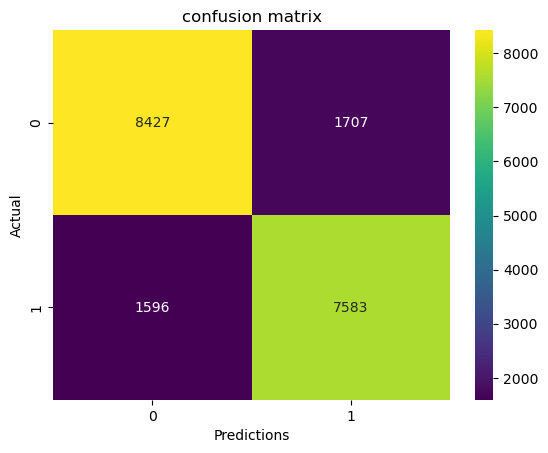

In [18]:
cm = confusion_matrix(y_test,y_pred_logistic)
cmap = plt.cm.viridis

sns.heatmap(cm,annot=True,fmt="d", cmap = cmap)

plt.title("confusion matrix")
plt.xlabel("Predictions")
plt.ylabel("Actual")

plt.show()

In [19]:
##Print the actual predictions for the test set and the percentage of belonging to each class 
print(f"Predictions: {y_pred_logistic}")
print(f"predictions percentage: {logistic_model.predict_proba(scaled_X_test)}")

Predictions: [0 0 1 ... 0 1 1]
predictions percentage: [[0.98656075 0.01343925]
 [0.99633738 0.00366262]
 [0.13983065 0.86016935]
 ...
 [0.77242375 0.22757625]
 [0.10353843 0.89646157]
 [0.07321011 0.92678989]]


In [20]:
from sklearn.metrics import precision_score, recall_score

logistic_recall = recall_score(y_test,y_pred_logistic)
print(f"Logistic_recall:{logistic_recall}")

Logistic_recall:0.826124850201547


In [21]:
logistic_accuracy = accuracy_score(y_test,y_pred_logistic)
print(f"Logistic_accurracy:{logistic_accuracy}")

Logistic_accurracy:0.8289753016103143


In [22]:
logistic_f1_score = 2 * (logistic_recall * logistic_accuracy) / (logistic_recall + logistic_accuracy)
print(f"Logistic f1 score:{logistic_f1_score}")

Logistic f1 score:0.827547621349563


In [23]:
##the model is fairly accurate, next we'll do KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

cv_error_rates = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X_train, y_train, cv=10, scoring="accuracy")
    cv_error_rates.append(1-scores.mean())

Text(0, 0.5, 'Error rate')

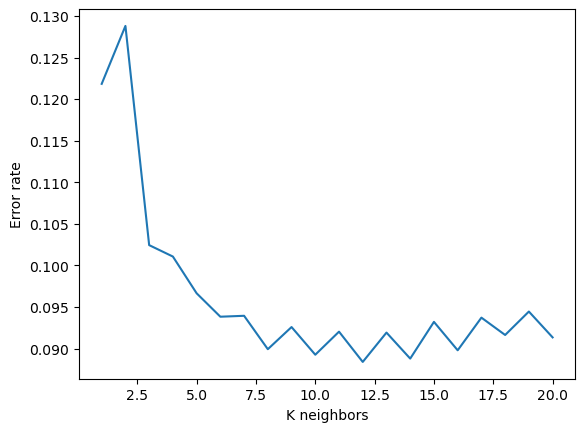

In [24]:
plt.plot(range(1,21), cv_error_rates)
plt.xlabel("K neighbors")
plt.ylabel("Error rate")

In [25]:
##We'll choose 8 k-neigbors since it has the lowest error rate before it starts fluctuating

In [26]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(scaled_X_train,y_train)
y_pred_knn = knn.predict(scaled_X_test)

confusion_matrix(y_test, y_pred_knn)

array([[9269,  865],
       [ 780, 8399]])

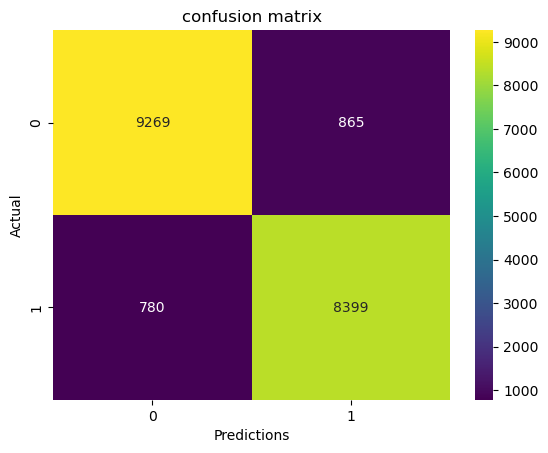

In [27]:
cm = confusion_matrix(y_test,y_pred_knn)
cmap = plt.cm.viridis

sns.heatmap(cm,annot=True,fmt="d", cmap = cmap)

plt.title("confusion matrix")
plt.xlabel("Predictions")
plt.ylabel("Actual")

plt.show()

In [28]:
##Print the actual predictions for the test set and the percentage of belonging to each class 
print(f"Predictions: {y_pred_knn}")
print(f"predictions percentage: {knn.predict_proba(scaled_X_test)}")

Predictions: [0 0 1 ... 0 1 1]
predictions percentage: [[1.    0.   ]
 [1.    0.   ]
 [0.375 0.625]
 ...
 [1.    0.   ]
 [0.125 0.875]
 [0.125 0.875]]


In [29]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN accuracy:{knn_accuracy}")

KNN accuracy:0.9148242116708952


In [30]:
knn_recall = recall_score(y_test,y_pred_knn)
print(f"KNN recall:{knn_recall}")

KNN recall:0.9150234230308313


In [31]:
knn_f1_score = 2 * (knn_recall * knn_accuracy) / (knn_recall + knn_accuracy)
print(f"Logistic f1 score:{knn_f1_score}")

Logistic f1 score:0.914923806507019


In [32]:
##The KNN model is a lot more accurate with high accuracy and recall scores, next well try an SVM model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {
    "kernel" : ["linear", "poly" ,"rbf"],
    "C" : [0.01,0.1,1]
}

grid = GridSearchCV(svm,param_grid)
grid.fit(scaled_X_train,y_train)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [33]:
##The grid search gave back optimal paramaters of C=1 and kernel="rbf", next well train our model based on those paramaters


In [34]:
optimal_svm = SVC(kernel="rbf", C=1)
optimal_svm.fit(scaled_X_train, y_train)

SVC(C=1)

In [35]:
y_pred_svm = optimal_svm.predict(scaled_X_test)
confusion_matrix(y_pred_svm,y_test)

array([[9390,  471],
       [ 744, 8708]])

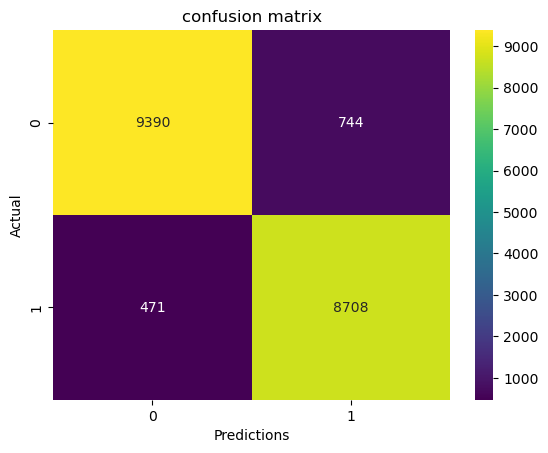

In [36]:
cm = confusion_matrix(y_test,y_pred_svm)
cmap = plt.cm.viridis

sns.heatmap(cm,annot=True,fmt="d", cmap = cmap)

plt.title("confusion matrix")
plt.xlabel("Predictions")
plt.ylabel("Actual")

plt.show()

In [37]:
##Print the actual predictions for the test set and the percentage of belonging to each class 
print(f"Predictions: {y_pred_svm}")
print("SVC doesnt have proba attribute")

Predictions: [0 0 1 ... 0 1 1]
SVC doesnt have proba attribute


In [38]:
svm_accuracy = accuracy_score(y_pred_svm,y_test)
print(f"SVM accuracy:{svm_accuracy}")

SVM accuracy:0.9370890074043391


In [39]:
svm_recall = recall_score(y_pred_svm,y_test)
print(f"SVM recall:{svm_recall}")

SVM recall:0.9212865002115954


In [41]:
svm_f1_score = 2 * (svm_recall * svm_accuracy) / (svm_recall + svm_accuracy)
print(f"SVM f1 score:{svm_f1_score}")

SVM f1 score:0.9291205663013107


In [42]:
##the SVM model is even more accurate than previous models, lastly well try a random forest model.
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators":[64,100,120,200],
    "max_features":[3,4,5,6],
    "bootstrap":[True,False],
    "oob_score":[True,False]
}

random_forest_model = RandomForestClassifier()
grid = GridSearchCV(random_forest_model, param_grid)

grid.fit(X_train,y_train)

print(grid.best_params_)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py", line 448, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=

{'bootstrap': False, 'max_features': 6, 'n_estimators': 120, 'oob_score': False}


In [54]:
##Now we will train our optimal model based on theese parameters: Bootsrap:False, max features:6, n_estimators:200, oob_score: False
optimal_random_forest_model = RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=120, oob_score=False)
optimal_random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=120)

In [55]:
y_pred_rand_for = optimal_random_forest_model.predict(X_test)

print(confusion_matrix(y_pred_rand_for,y_test))

[[10131     1]
 [    3  9178]]


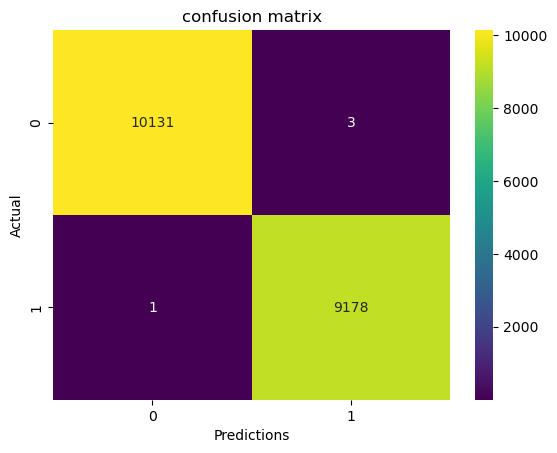

In [56]:
cm = confusion_matrix(y_test,y_pred_rand_for)
cmap = plt.cm.viridis

sns.heatmap(cm,annot=True,fmt="d", cmap = cmap)

plt.title("confusion matrix")
plt.xlabel("Predictions")
plt.ylabel("Actual")

plt.show()

In [57]:
##Print the actual predictions for the test set and the percentage of belonging to each class 
print(f"Predictions: {y_pred_rand_for}")
print(f"predictions percentage: {optimal_random_forest_model.predict_proba(scaled_X_test)}")

Predictions: [0 0 1 ... 0 1 1]
predictions percentage: [[0.90833333 0.09166667]
 [0.93333333 0.06666667]
 [0.91666667 0.08333333]
 ...
 [0.1        0.9       ]
 [0.08333333 0.91666667]
 [0.23333333 0.76666667]]


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [58]:
rand_for_recall = recall_score(y_pred_rand_for,y_test)
print(rand_for_recall)

0.9996732382093454


In [59]:
rand_for_accuracy = accuracy_score(y_pred_rand_for,y_test)
print(rand_for_accuracy)

0.9997928856210843


In [60]:
rand_for_f1_score = 2 * (rand_for_recall * rand_for_accuracy) / (rand_for_recall + rand_for_accuracy)
print(f"Logistic f1 score:{rand_for_f1_score}")

Logistic f1 score:0.9997330583353834


In [61]:
##It seems the random forest is the best classification model, it predicts the custormers churn with almost 100% accuracy

In [62]:
##Generate a dataframe that contains each model and its values for the Accuracy, Recall and F1-Score metrics.
data = {
    "Model" : ["Logistic","KNN","SVC","Random_forest"],
    "Accuracy_score" : [logistic_accuracy,knn_accuracy,svm_accuracy,rand_for_accuracy],
    "Recall_score" : [logistic_recall,knn_recall,svm_recall,rand_for_recall],
    "F1_score" : [logistic_f1_score,knn_f1_score,svm_f1_score,rand_for_f1_score]
}

model_values_df = pd.DataFrame(data)

In [63]:
model_values_df

,Model,Accuracy_score,Recall_score,F1_score
0,Logistic,0.828975,0.826125,0.827548
1,KNN,0.914824,0.915023,0.914924
2,SVC,0.937089,0.921287,0.929121
3,Random_forest,0.999793,0.999673,0.999733


In [64]:
##We're going to choose the random forest model since it has the most accurate results, 
##next we'll train the model on the entire dataset with the optimal paramater values we found.
final_classification_model = RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=200, oob_score=False)
final_classification_model.fit(X,y)

RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=200)

In [66]:
##since random forest doesnt need scaling we dont need to export one.
import joblib
joblib.dump(final_classification_model,"final_classification_model.joblib")

['final_classification_model.joblib']

In [67]:
##now we load our model into out work enviroment
loaded_model = joblib.load("final_classification_model.joblib")

In [68]:
##We'll do a little test with out model on our dataset
last_pred = loaded_model.predict(X)
confusion_matrix(last_pred,y)

array([[33881,     0],
       [    0, 30493]])

In [ ]:
##since the model is 100% accurate we can confirm that it is the model we trained on the dataset
